Using PyTorchViz, a Python visualization tool that renders the autograd graph using Graphviz.

pip install torchviz graphviz

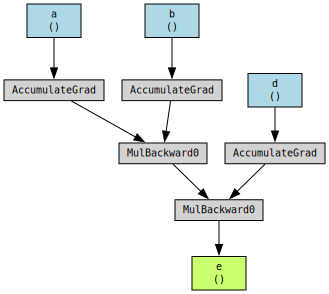

In [1]:
import torch
from torchviz import make_dot

# Build computation graph
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = a * b
d = torch.tensor(4.0, requires_grad=True)
e = c * d

# Compute backward
e.backward()

# Build param dict with readable names and data
params = {
    'a': a,
    'b': b,
    'c': c,
    'd': d,
    'e': e
}

# Create a detailed visualization with tensor values shown
dot = make_dot(e, params=params)

# Render the graph (save to file)
dot.render('autograd_graph', format='png')

# If you’re in Jupyter, just display inline
dot


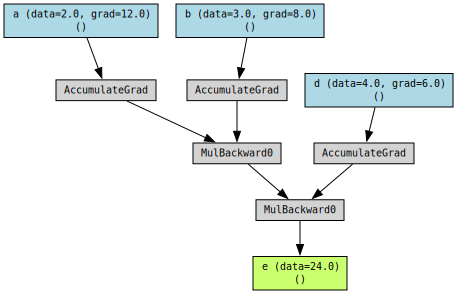

In [3]:
import torch
from torchviz import make_dot

# Build computation graph
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = a * b
d = torch.tensor(4.0, requires_grad=True)
e = c * d
e.backward()

# Create a custom labeling dictionary that includes both .data and .grad
params = {
    'a (data=%.1f, grad=%.1f)' % (a.item(), a.grad.item()): a,
    'b (data=%.1f, grad=%.1f)' % (b.item(), b.grad.item()): b,
    'c (data=%.1f)' % (c.item()): c,
    'd (data=%.1f, grad=%.1f)' % (d.item(), d.grad.item()): d,
    'e (data=%.1f)' % (e.item()): e,
}

# Generate the graph
dot = make_dot(e, params=params)
dot.attr(rankdir='TB')  # top-to-bottom layout

# Display inline in Jupyter
dot
